In [9]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

ngdp_data = pf.get_series(series_id="GDP", api_key=api_key)

# calculate difference
ngdp_data['change'] = ngdp_data['value'] - ngdp_data['value'].shift(1)
ngdp_data['change'] = ngdp_data['change']

print(ngdp_data)

ngdp_info = pf.get_series_info(series_id="GDP", api_key=api_key)

    realtime_start realtime_end       date      value   change
0       2023-05-13   2023-05-13 1946-01-01        NaN      NaN
1       2023-05-13   2023-05-13 1946-04-01        NaN      NaN
2       2023-05-13   2023-05-13 1946-07-01        NaN      NaN
3       2023-05-13   2023-05-13 1946-10-01        NaN      NaN
4       2023-05-13   2023-05-13 1947-01-01    243.164      NaN
..             ...          ...        ...        ...      ...
304     2023-05-13   2023-05-13 2022-01-01  24740.480  391.359
305     2023-05-13   2023-05-13 2022-04-01  25248.476  507.996
306     2023-05-13   2023-05-13 2022-07-01  25723.941  475.465
307     2023-05-13   2023-05-13 2022-10-01  26137.992  414.051
308     2023-05-13   2023-05-13 2023-01-01  26465.865  327.873

[309 rows x 5 columns]


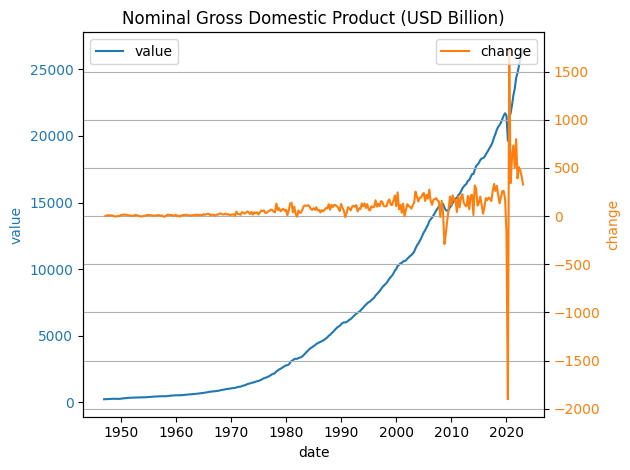

In [10]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Date', 'Value', and 'Change'

# Create the figure and the first subplot
fig, ax1 = plt.subplots()

# Plot the 'Value' column on the first axis
ax1.plot(ngdp_data['date'], ngdp_data['value'], color='tab:blue', label='value')
ax1.set_xlabel('date')
ax1.set_ylabel('value', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second subplot sharing the x-axis with the first subplot
ax2 = ax1.twinx()

# Plot the 'Change' column on the second axis
ax2.plot(ngdp_data['date'], ngdp_data['change'], color='tab:orange', label='change')
ax2.set_ylabel('change', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set titles and legends
plt.title('Nominal Gross Domestic Product (USD Billion)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


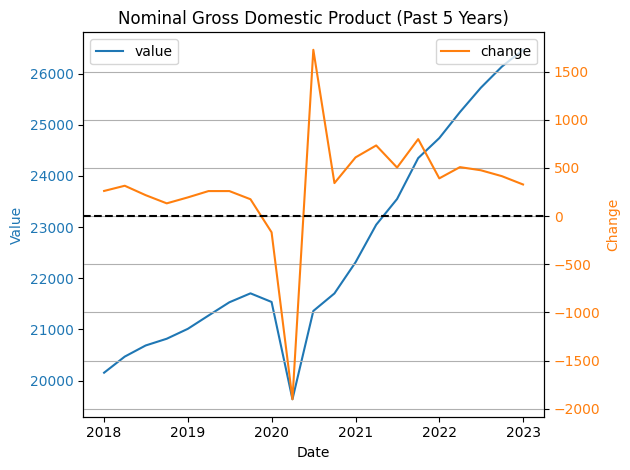

In [11]:
# Filter the DataFrame for the past 5 years
past_5_years_data = ngdp_data[ngdp_data['date'] >= ngdp_data['date'].max() - pd.DateOffset(years=5)]

# Create the figure and the first subplot
fig, ax1 = plt.subplots()

# Plot the 'value' column on the first axis
ax1.plot(past_5_years_data['date'], past_5_years_data['value'], color='tab:blue', label='value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second subplot sharing the x-axis with the first subplot
ax2 = ax1.twinx()

# Plot the 'change' column on the second axis
ax2.plot(past_5_years_data['date'], past_5_years_data['change'], color='tab:orange', label='change')
ax2.set_ylabel('Change', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set titles and legends
plt.title('Nominal Gross Domestic Product (Past 5 Years)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Convert DataFrame to JSON
ngdp_json = ngdp_data.to_json(orient='records')

# Parse the JSON
data = json.loads(ngdp_json)

# Get the last item
last_item = data[-1]

print(str(ngdp_info.title) + ": " + str(last_item['value']) + " " + str(ngdp_info.units) + " | Last Updated: " + str(ngdp_info.last_updated))
print(str(ngdp_info.title) + ": " + str(last_item['change']) + " " + str(ngdp_info.units) + " | Last Updated: " + str(ngdp_info.last_updated))

Gross Domestic Product: 26465.865 Billions of Dollars | Last Updated: 2023-04-27 07:53:02-05
Gross Domestic Product: 327.873 Billions of Dollars | Last Updated: 2023-04-27 07:53:02-05


In [13]:
print("Info: " + str(ngdp_info.id))
print("Title: " + str(ngdp_info.title))
print("Frequency: " + str(ngdp_info.frequency))
print("Units: " + str(ngdp_info.units))
print("Last Updated: " + str(ngdp_info.last_updated))
print("Popularity: " + str(ngdp_info.popularity))
print("Notes: " + str(ngdp_info.notes))

Info: GDP
Title: Gross Domestic Product
Frequency: Quarterly
Units: Billions of Dollars
Last Updated: 2023-04-27 07:53:02-05
Popularity: 93
Notes: BEA Account Code: A191RC

Gross domestic product (GDP), the featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.For more information, see the Guide to the National Income and Product Accounts of the United States (NIPA) and the Bureau of Economic Analysis (http://www.bea.gov/national/pdf/nipaguid.pdf).
